In [1]:
import pandas as pd

df = pd.read_json("./data/Pet_Supplies_5.json", lines=True)
df.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,NaN,NaN
1,3,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,NaN,NaN
2,5,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN
3,3,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN
4,2,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,NaN,NaN


In [2]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         40000 non-null  int64 
 1   vote            3903 non-null   object
 2   verified        40000 non-null  bool  
 3   reviewTime      40000 non-null  object
 4   reviewerID      40000 non-null  object
 5   asin            40000 non-null  object
 6   reviewerName    39999 non-null  object
 7   reviewText      39987 non-null  object
 8   summary         39996 non-null  object
 9   unixReviewTime  40000 non-null  int64 
 10  style           29821 non-null  object
 11  image           763 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 3.4+ MB


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

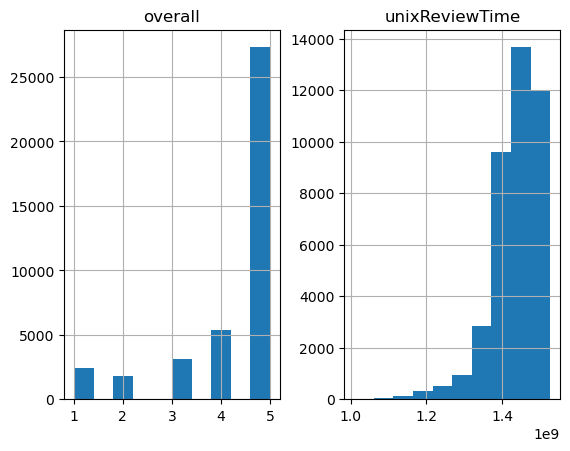

In [3]:
df.hist()


In [4]:
len_df = len(df)
print(len_df)

len_train = int(round(len_df * 0.6))
len_val_test = (len_df - len_train) // 4
len_train = len_train // 2

print(len_train)
print(len_val_test)

40000
12000
4000


In [5]:
df_1 = df.loc[df['overall'] == 1].copy().dropna(subset="reviewText")
df_2 = df.loc[df['overall'] == 2].copy().dropna(subset="reviewText")
df_3 = df.loc[df['overall'] == 3].copy().dropna(subset="reviewText")
df_4 = df.loc[df['overall'] == 4].copy().dropna(subset="reviewText")
df_5 = df.loc[df['overall'] == 5].copy().dropna(subset="reviewText")
df_5 = df_5.drop(df_5.index[range(20000)]) # hogy ne legyen ennyi 5 csillagos értékelés

In [6]:


len_df_1 = len(df_1)
len_df_2 = len(df_2)
len_df_3 = len(df_3)
len_df_4 = len(df_4)
len_df_5 = len(df_5)

len_train_1 = int(round(len_df_1 * 0.7))
len_val_test_1 = (len_df_1 - len_train_1) // 4
len_train_1 = len_train_1 // 2

len_train_2 = int(round(len_df_2 * 0.7))
len_val_test_2 = (len_df_2 - len_train_2) // 4
len_train_2 = len_train_2 // 2

len_train_3 = int(round(len_df_3 * 0.7))
len_val_test_3 = (len_df_3 - len_train_3) // 4
len_train_3 = len_train_3 // 2

len_train_4 = int(round(len_df_4 * 0.7))
len_val_test_4 = (len_df_4 - len_train_4) // 4
len_train_4 = len_train_4 // 2

len_train_5 = int(round(len_df_5 * 0.7))
len_val_test_5 = (len_df_5 - len_train_5) // 4
len_train_5 = len_train_5 // 2



df_1_test = df_1[:len_train_1].copy()
df_2_test = df_2[:len_train_2].copy()
df_3_test = df_3[:len_train_3].copy()
df_4_test = df_4[:len_train_4].copy()
df_5_test = df_5[:len_train_5].copy()

df_1_val = df_1[len_train_1:len_train_1+len_val_test_1].copy()
df_2_val = df_2[len_train_2:len_train_2+len_val_test_2].copy()
df_3_val = df_3[len_train_3:len_train_3+len_val_test_3].copy()
df_4_val = df_4[len_train_4:len_train_4+len_val_test_4].copy()
df_5_val = df_5[len_train_5:len_train_5+len_val_test_5].copy()

df_1_train = df_1[len_train_1+len_val_test_1:].copy()
df_2_train = df_2[len_train_2+len_val_test_2:].copy()
df_3_train = df_3[len_train_3+len_val_test_3:].copy()
df_4_train = df_4[len_train_4+len_val_test_4:].copy()
df_5_train = df_5[len_train_5+len_val_test_5:].copy()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

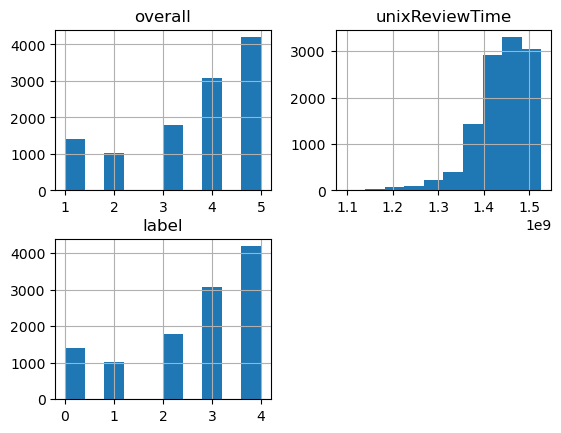

In [7]:
df_train = pd.concat([df_1_train, df_2_train, df_3_train, df_4_train, df_5_train])
df_train = df_train.sample(frac=1)
df_train["label"] = df_train["overall"].values-1
df_train.hist()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

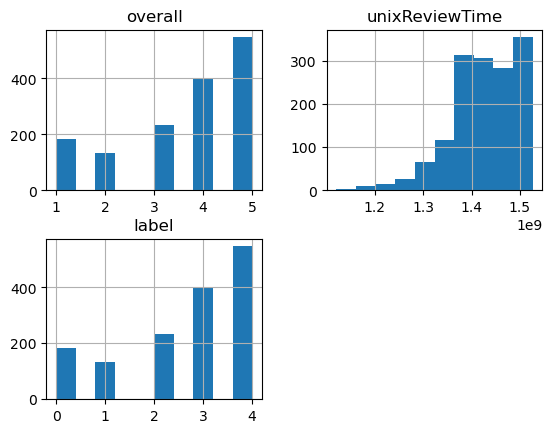

In [8]:
df_val = pd.concat([df_1_val, df_2_val, df_3_val, df_4_val, df_5_val])
df_val = df_val.sample(frac=1)
df_val["label"] = df_val["overall"].values-1
df_val.hist()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

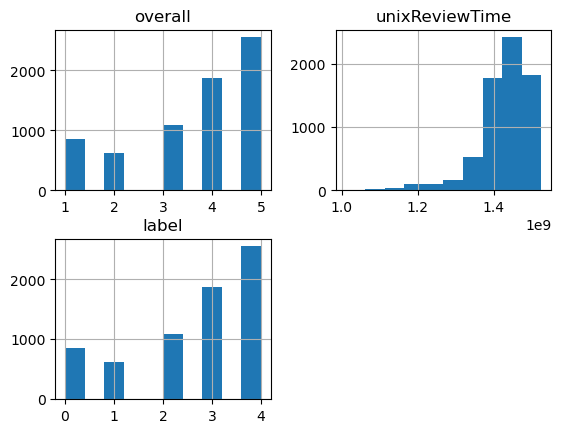

In [9]:
df_test = pd.concat([df_1_test, df_2_test, df_3_test, df_4_test, df_5_test])
df_test = df_test.sample(frac=1)
df_test["label"] = df_test["overall"].values-1
df_test.hist()
#df_test.head(5)

In [10]:
import json

train = "./data/pet_supplies_train.json"
df_train.to_json(train, orient="records")


In [11]:
df_readed_train = pd.read_json(train, orient='records')
df_readed_train.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,label
0,5,None,True,"05 27, 2017",A3PL7Y3YD8JFGK,B000255NAK,J. Covert,"Received early, great product.",great product.,1495843200,{'Style:': ' Nitrate'},None,4
1,3,None,True,"04 2, 2015",A3BEYTAVDKX9BQ,B0001RW19U,Poseidon,I got these and one bottle was past the exipir...,check the expiration date,1427932800,None,None,2
2,1,None,True,"08 29, 2017",AOHN7JPLZWX3S,B000084E7Y,Nicole Robillard,My Dog had this for 5 minutes,One Star,1503964800,{'Color:': ' Assorted'},None,0
3,5,None,True,"11 4, 2017",AEJZMXUWATW9H,B000255NAK,R. C.,This ammonia test kit contains 2 bottles & a c...,Api Ammonia Test Kit,1509753600,{'Style:': ' Ammonia'},None,4
4,4,15,True,"05 1, 2012",A1GJ7UYEX30TPU,B000255NAK,Geomancer,This is a necessary test kit if you are needin...,Necessary if you modify GH/KH,1335830400,{'Style:': ' GH & KH'},None,3


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

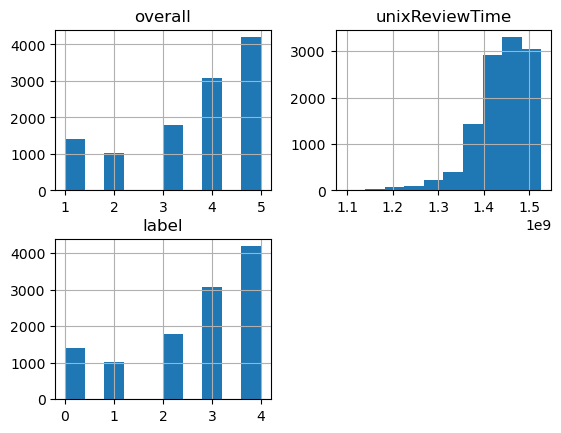

In [12]:
df_readed_train.hist()

In [13]:
val = "./data/pet_supplies_val.json"
df_val.to_json(val, orient="records")
df_readed_val = pd.read_json(val, orient='records')
df_readed_val.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,label
0,3,NaN,True,"01 16, 2016",AG26VPPO8NN6O,B000084F44,BW,dog didn't like them,Three Stars,1452902400,None,None,2
1,2,NaN,True,"07 10, 2014",A1GRIPK8M086NW,B000084ES8,Hsdx3,My cats refused to eat this and they aren't fi...,Two Stars,1404950400,"{'Size:': ' 5.5-Ounce Can (Pack of 24)', 'Flav...",None,1
2,5,NaN,True,"03 31, 2018",A1OUKWRTPO7EK6,B000255NAK,AudLind,Accurate and clear results. I appreciate this ...,Five Stars,1522454400,{'Style:': ' GH & KH'},None,4
3,4,NaN,True,"02 11, 2016",A2RAXNR9IGKVYY,B000084F39,YankeeinSC,I purchased this to donate to an animal rescue...,"Okay, a bit thin.",1455148800,{'Size:': ' Small'},None,3
4,5,NaN,True,"03 26, 2013",A3KFC8Z5P33GSN,B00023XCYG,Lisa,This carpet was great for catching the extra l...,Wonderful product!,1364256000,None,None,4


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

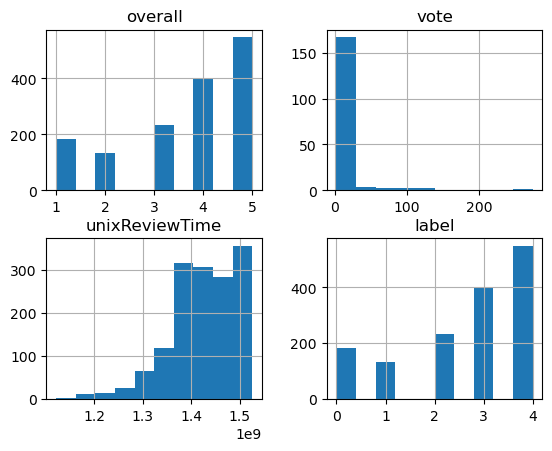

In [14]:
df_readed_val.hist()

In [15]:
test = "./data/pet_supplies_test.json"
df_test.to_json(test, orient="records")
df_readed_test = pd.read_json(test, orient='records')
df_readed_test.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,label
0,2,NaN,True,"05 31, 2016",A3PSAYKLJH5PIP,9822497938,Oh_Chasquido,Ordered 2 and they were like two totally diffe...,Not like picture,1464652800,{'Size:': ' Small'},None,1
1,4,NaN,True,"06 10, 2010",A1P9YZK0D837QO,B00006IX59,Janet Lirette,This is a great thing to use to play ball with...,Chuckit ball thrower,1276128000,"{'Size:': ' SPORT 12M', 'Color:': ' ASSORTED'}",None,3
2,1,4.0,False,"06 19, 2013",AT9YJ7PG0MRAF,B000084EJO,Artana,"If you love your cat, don't feed her this garb...",GARBAGE GARBAGE GARBAGE,1371600000,None,None,0
3,5,NaN,False,"09 29, 2014",A2XLLCW50TBFFZ,B0001AB42W,Sandy Peralta,Deserves the 5 star!! This is about the only t...,So far so good but 5 stars for the immediate r...,1411948800,"{'Size:': ' Medium 30"" x 16""', 'Style:': ' Mat...",None,4
4,5,NaN,True,"01 4, 2016",A3NTFZS442MKPG,B0001RTDIC,Mark,Good price. Great shipping. quite running with...,Good price. Great shipping,1451865600,None,None,4


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

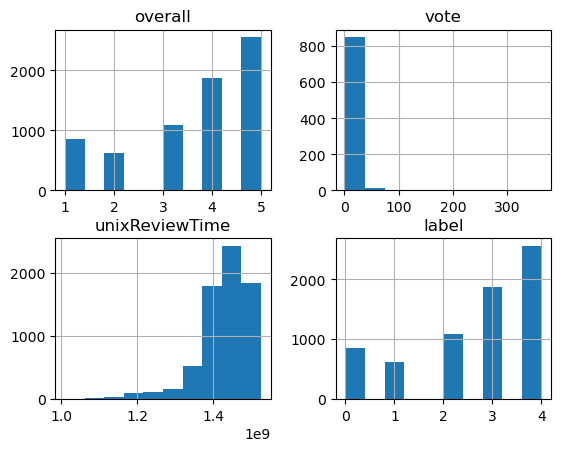

In [16]:
df_readed_test.hist()

In [17]:
import numpy as np
from tokenizers import BertWordPieceTokenizer

tokenizer = BertWordPieceTokenizer("./data/bert-base-uncased-vocab.txt",
                                   lowercase=True)

def bert_tokenizer(data):
    result = []
    for item in data:
        result.append(tokenizer.encode(item).ids)
    
    return np.array(result, dtype=object)

In [18]:
df_readed_train[df_readed_train["reviewText"].isnull()]

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,label


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

tokenized_reviews = df_train["reviewText"].apply(lambda review_text: word_tokenize(review_text.lower()))

tokenized_reviews.head()

[nltk_data] Downloading package punkt to /Users/kvcsmiki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


34903              [received, early, ,, great, product, .]
31667    [i, got, these, and, one, bottle, was, past, t...
21520                [my, dog, had, this, for, 5, minutes]
34571    [this, ammonia, test, kit, contains, 2, bottle...
39709    [this, is, a, necessary, test, kit, if, you, a...
Name: reviewText, dtype: object

In [20]:


nltk.download('stopwords')

STOPWORDS = stopwords.words("english")

STOPWORDS[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kvcsmiki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
d = dict()

for review in tokenized_reviews:
    for word in review:
        if word not in STOPWORDS and word.isalpha():
            d[word] = d.get(word, 0) + 1
  

In [22]:



VOCAB = [k for k,v in sorted(d.items(), key=lambda item: item[1], reverse=True)]

In [23]:
len(VOCAB)

14141

In [24]:
import tensorflow as tf

maxlen = 128

X_train = list(df_readed_train["reviewText"].values)
X_train = bert_tokenizer(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
y_train = df_train["label"].values

X_val = list(df_readed_val["reviewText"].values)
X_val = bert_tokenizer(X_val)
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)
y_val = df_val["label"].values


X_test = list(df_readed_test["reviewText"].values)
X_test = bert_tokenizer(X_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
y_test = df_test["label"].values

In [25]:
print(X_train.shape)
print(y_train.shape)

(11495, 128)
(11495,)


In [26]:
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

maxlen = 128
emb_size = 32
max_features = 200000 # vocab size

model_simple_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.SimpleRNN(units=emb_size, activation='tanh'),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model_simple_rnn.compile(optimizer='adam',
                         loss="sparse_categorical_crossentropy",
                         metrics=['accuracy'])

model_simple_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 32)           6400000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 6,402,245
Trainable params: 6,402,245
Non-trainable params: 0
_________________________________________________________________


In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h_simple_rnn = model_simple_rnn.fit(X_train, 
                                    y_train,
                                    epochs=5,
                                    batch_size=32,
                                    callbacks=[callback],
                                    validation_data=(X_val, y_val)
                                   )

Epoch 1/5
360/360 [==============================] - 8s 20ms/step - loss: 1.2452 - accuracy: 0.4861 - val_loss: 1.3995 - val_accuracy: 0.4413
Epoch 2/5
360/360 [==============================] - 7s 20ms/step - loss: 1.0179 - accuracy: 0.5873 - val_loss: 1.4710 - val_accuracy: 0.4252
Epoch 3/5
360/360 [==============================] - 7s 20ms/step - loss: 0.7881 - accuracy: 0.7132 - val_loss: 1.5246 - val_accuracy: 0.4266


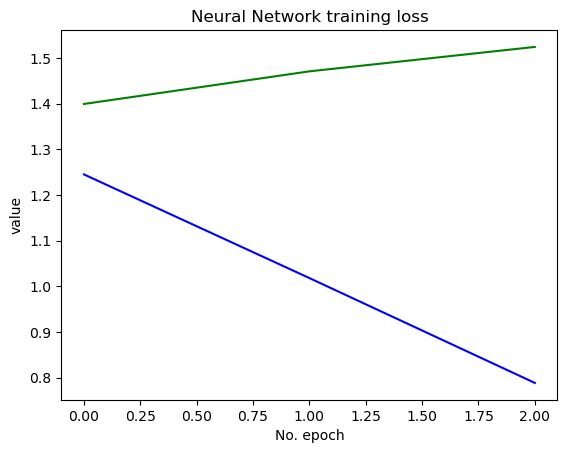

In [28]:
import matplotlib.pyplot as plt

plt.plot(h_simple_rnn.history['loss'], label='(training data)',color='blue')
plt.plot(h_simple_rnn.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

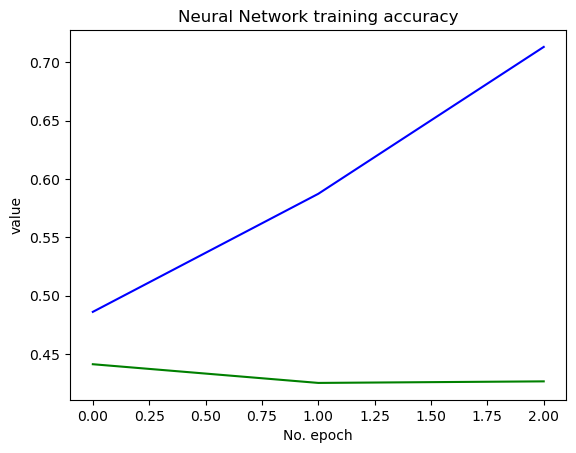

In [29]:
import matplotlib.pyplot as plt

plt.plot(h_simple_rnn.history['accuracy'], label='(training data)',color='blue')
plt.plot(h_simple_rnn.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [30]:
results = model_simple_rnn.evaluate(X_test, y_test, batch_size=32)
print("Simple rnn test loss, test acc:", results)

219/219 [==============================] - 1s 3ms/step - loss: 1.7869 - accuracy: 0.3490
Simple rnn test loss, test acc: [1.7868866920471191, 0.34901344776153564]


In [31]:
import tensorflow as tf

emb_size = 32
max_features = 200000 # vocab size

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.LSTM(units=emb_size, activation='tanh'),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model_lstm.compile(optimizer='adam',
                   loss="sparse_categorical_crossentropy",
                   metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 32)           6400000   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 6,408,485
Trainable params: 6,408,485
Non-trainable params: 0
_________________________________________________________________


In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h_lstm = model_lstm.fit(X_train, 
                        y_train,
                        epochs=5,
                        batch_size=32,
                        callbacks=[callback],
                        validation_data=(X_val, y_val))

Epoch 1/5
360/360 [==============================] - 13s 33ms/step - loss: 1.2445 - accuracy: 0.4809 - val_loss: 1.5330 - val_accuracy: 0.4299
Epoch 2/5
360/360 [==============================] - 12s 33ms/step - loss: 1.0559 - accuracy: 0.5554 - val_loss: 1.4138 - val_accuracy: 0.4493
Epoch 3/5
360/360 [==============================] - 12s 33ms/step - loss: 0.9108 - accuracy: 0.6293 - val_loss: 1.3247 - val_accuracy: 0.5053
Epoch 4/5
360/360 [==============================] - 12s 33ms/step - loss: 0.7878 - accuracy: 0.6830 - val_loss: 1.5360 - val_accuracy: 0.4706
Epoch 5/5
360/360 [==============================] - 12s 33ms/step - loss: 0.6993 - accuracy: 0.7257 - val_loss: 1.5968 - val_accuracy: 0.4833


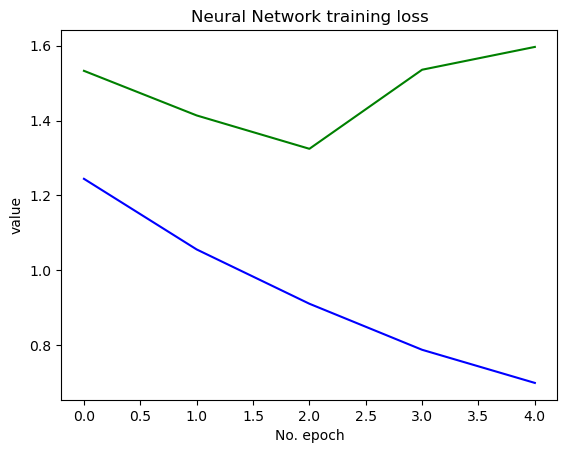

In [33]:
import matplotlib.pyplot as plt

plt.plot(h_lstm.history['loss'], label='(training data)',color='blue')
plt.plot(h_lstm.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

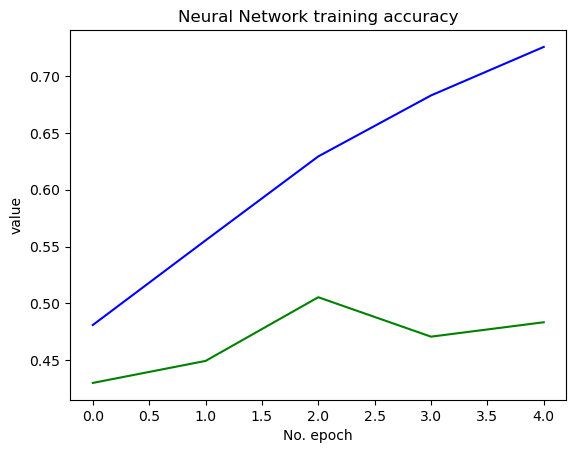

In [34]:
import matplotlib.pyplot as plt

plt.plot(h_lstm.history['accuracy'], label='(training data)',color='blue')
plt.plot(h_lstm.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [35]:
results = model_lstm.evaluate(X_test, y_test, batch_size=32)
print("LSTM test loss, test acc:", results)

219/219 [==============================] - 1s 7ms/step - loss: 1.9737 - accuracy: 0.3949
LSTM test loss, test acc: [1.9736979007720947, 0.39490991830825806]


In [36]:
import tensorflow as tf

emb_size = 32
max_features = 200000 # vocab size

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.GRU(units=emb_size, activation='tanh'),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model_gru.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 128, 32)           6400000   
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 6,406,501
Trainable params: 6,406,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h_gru = model_gru.fit(X_train, 
                      y_train,
                      epochs=5,
                      batch_size=32,
                      callbacks=[callback],
                      validation_data=(X_val, y_val))

Epoch 1/5
360/360 [==============================] - 13s 35ms/step - loss: 1.2630 - accuracy: 0.4659 - val_loss: 1.6369 - val_accuracy: 0.4012
Epoch 2/5
360/360 [==============================] - 12s 34ms/step - loss: 1.0498 - accuracy: 0.5548 - val_loss: 1.3602 - val_accuracy: 0.4753
Epoch 3/5
360/360 [==============================] - 12s 34ms/step - loss: 0.9497 - accuracy: 0.6033 - val_loss: 1.4691 - val_accuracy: 0.4686
Epoch 4/5
360/360 [==============================] - 12s 34ms/step - loss: 0.8391 - accuracy: 0.6509 - val_loss: 1.3730 - val_accuracy: 0.5060
Epoch 5/5
199/360 [===============>..............] - ETA: 5s - loss: 0.7375 - accuracy: 0.6999

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h_gru.history['loss'], label='(training data)',color='blue')
plt.plot(h_gru.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h_gru.history['accuracy'], label='(training data)',color='blue')
plt.plot(h_gru.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
results = model_gru.evaluate(X_test, y_test, batch_size=32)
print("GRU test loss, test acc:", results)